# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['hilo',
 'chapais',
 'bose',
 'inhambane',
 'kapaa',
 'pestyaki',
 'rikitea',
 'hermanus',
 'tecoanapa',
 'cidreira',
 'bengkulu',
 'qaanaaq',
 'pichayevo',
 'vaini',
 'severo-kurilsk',
 'saint-philippe',
 'atuona',
 'bowen',
 'barentsburg',
 'punta arenas',
 'ust-kuyga',
 'kaitangata',
 'vieques',
 'thompson',
 'mataura',
 'albany',
 'east london',
 'sao filipe',
 'nioro',
 'illoqqortoormiut',
 'ostrovnoy',
 'stornoway',
 'henties bay',
 'tafresh',
 'fairbanks',
 'fuxin',
 'constitucion',
 'barrow',
 'chokurdakh',
 'ushuaia',
 'busselton',
 'puerto ayora',
 'goderich',
 'sobolevo',
 'amderma',
 'khatanga',
 'port macquarie',
 'yellowknife',
 'cairns',
 'bolshoy lug',
 'nieuw nickerie',
 'pevek',
 'russell',
 'hobart',
 'balikpapan',
 'roald',
 'arraial do cabo',
 'mount isa',
 'chulman',
 'prince rupert',
 'avarua',
 'gravelbourg',
 'sogne',
 'saskylakh',
 'mnogovershinnyy',
 'munsingen',
 'humaita',
 'bollnas',
 'nizhneyansk',
 'lamu',
 'panaba',
 'port-gentil',
 'taolanaro',
 'aykh

In [3]:
len(cities)

578

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# create a variable for the openweather api 
url = "http://api.openweathermap.org/data/2.5/weather?"

# create sample city list as working list to avoid api limits
sample_cities = ['moron',
 'fortuna',
 'puerto ayora',
 'busselton',
 'rikitea',
 'yellowknife',
 'bluff',
 'padang',]

# create lists to store returned values from the api
new_city_list = []
latitude_list = []
longitude_list = []
temperature_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []

count = 1
# create a new url variable
query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" 

# Loop over cities
for city in cities:
    
    count += 1
    print(f"Processing Record {count}: {city}")
    weather_response = requests.get(query_url + city).json()
    
    try:
        new_city_list.append(weather_response['name'])
        latitude_list.append(weather_response['coord']['lat'])
        longitude_list.append(weather_response['coord']['lon'])
        temperature_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        wind_speed_list.append(weather_response['wind']['speed'])
        country_list.append(weather_response['sys']['country'])
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    print("---------------")
print("Data Retrieval Complete")
count = 0
print("---------------")

Processing Record 2: hilo
---------------
Processing Record 3: chapais
---------------
Processing Record 4: bose
---------------
Processing Record 5: inhambane
---------------
Processing Record 6: kapaa
---------------
Processing Record 7: pestyaki
---------------
Processing Record 8: rikitea
---------------
Processing Record 9: hermanus
---------------
Processing Record 10: tecoanapa
---------------
Processing Record 11: cidreira
---------------
Processing Record 12: bengkulu
---------------
Processing Record 13: qaanaaq
---------------
Processing Record 14: pichayevo
---------------
Processing Record 15: vaini
---------------
Processing Record 16: severo-kurilsk
---------------
Processing Record 17: saint-philippe
---------------
Processing Record 18: atuona
---------------
Processing Record 19: bowen
---------------
Processing Record 20: barentsburg
City not found. Skipping...
---------------
Processing Record 21: punta arenas
---------------
Processing Record 22: ust-kuyga
--------

---------------
Processing Record 166: cherskiy
---------------
Processing Record 167: pacific grove
---------------
Processing Record 168: skalistyy
City not found. Skipping...
---------------
Processing Record 169: sur
---------------
Processing Record 170: hithadhoo
---------------
Processing Record 171: machala
---------------
Processing Record 172: saint-augustin
---------------
Processing Record 173: dingle
---------------
Processing Record 174: guerrero negro
---------------
Processing Record 175: puerto ayacucho
---------------
Processing Record 176: torbay
---------------
Processing Record 177: fortuna
---------------
Processing Record 178: koutiala
---------------
Processing Record 179: pisco
---------------
Processing Record 180: taltal
---------------
Processing Record 181: ilinsko-podomskoye
City not found. Skipping...
---------------
Processing Record 182: eyl
---------------
Processing Record 183: waddan
---------------
Processing Record 184: husavik
---------------
Proc

---------------
Processing Record 333: broome
---------------
Processing Record 334: bibiani
---------------
Processing Record 335: ayagoz
---------------
Processing Record 336: gravdal
---------------
Processing Record 337: sulangan
---------------
Processing Record 338: lompoc
---------------
Processing Record 339: tigre
---------------
Processing Record 340: liaozhong
---------------
Processing Record 341: bath
---------------
Processing Record 342: cap malheureux
---------------
Processing Record 343: livingston
---------------
Processing Record 344: lorengau
---------------
Processing Record 345: manyana
---------------
Processing Record 346: cabedelo
---------------
Processing Record 347: deputatskiy
---------------
Processing Record 348: yulara
---------------
Processing Record 349: gobabis
---------------
Processing Record 350: kruisfontein
---------------
Processing Record 351: noshiro
---------------
Processing Record 352: kenai
---------------
Processing Record 353: wagar
--

---------------
Processing Record 502: placido de castro
---------------
Processing Record 503: raudeberg
---------------
Processing Record 504: ketchikan
---------------
Processing Record 505: rio tuba
---------------
Processing Record 506: zhuji
---------------
Processing Record 507: ola
---------------
Processing Record 508: luang prabang
---------------
Processing Record 509: yokadouma
---------------
Processing Record 510: usinsk
---------------
Processing Record 511: barkly west
---------------
Processing Record 512: marienburg
---------------
Processing Record 513: catia la mar
---------------
Processing Record 514: north platte
---------------
Processing Record 515: porto novo
---------------
Processing Record 516: santarem
---------------
Processing Record 517: port blair
---------------
Processing Record 518: ajdabiya
---------------
Processing Record 519: mamou
---------------
Processing Record 520: wuda
---------------
Processing Record 521: gangotri
City not found. Skippin

In [7]:
weather_response = requests.get(query_url + cities[0]).json()
print(new_city_list)

['Hilo', 'Chapais', 'Bose', 'Inhambane', 'Kapaa', 'Pestyaki', 'Rikitea', 'Hermanus', 'Barra de Tecoanapa', 'Cidreira', 'Bengkulu', 'Qaanaaq', 'Pichayevo', 'Vaini', "Severo-Kuril'sk", 'Saint-Philippe', 'Atuona', 'Bowen', 'Punta Arenas', 'Ust-Kuyga', 'Kaitangata', 'Vieques', 'Thompson', 'Mataura', 'Albany', 'East London', 'São Filipe', 'Nioro', 'Ostrovnoy', 'Stornoway', 'Henties Bay', 'Tafresh', 'Fairbanks', 'Fuxin', 'Constitución', 'Barrow', 'Chokurdakh', 'Ushuaia', 'Busselton', 'Puerto Ayora', 'Goderich', 'Sobolevo', 'Khatanga', 'Port Macquarie', 'Yellowknife', 'Cairns', 'Bolshoy Lug', 'Nieuw Nickerie', 'Pevek', 'Russell', 'Hobart', 'Balikpapan', 'Roald', 'Arraial do Cabo', 'Mount Isa', "Chul'man", 'Prince Rupert', 'Avarua', 'Gravelbourg', 'Søgne', 'Saskylakh', 'Mnogovershinnyy', 'Münsingen', 'Humaitá', 'Bollnäs', 'Lamu', 'Panabá', 'Port-Gentil', 'Aykhal', 'Port Elizabeth', 'Cape Town', 'Vienenburg', 'Kapit', 'Faya', 'Shubarkuduk', 'Aksarka', 'Kudahuvadhoo', 'Carnarvon', 'Khorramshahr'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = { 
'City': new_city_list,
'Lat': latitude_list,
'Lng': longitude_list,
'Max Temp': temperature_list,
'Humidity': humidity_list,
'Cloudiness': cloudiness_list,
'Wind Speed': wind_speed_list,
'Country': country_list
}

weather_df = pd.DataFrame(weather_dict)
weather_df

weather_df.to_csv(r"C:\Users\robma\homework\python-api-challenge\weatherpy\csv_file\weather.csv", index=False, header=True)

In [9]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Hilo,19.7297,-155.0900,78.8,53,75,4.61,US
1,Chapais,49.7834,-74.8492,6.8,61,1,3.44,CA
2,Bose,45.4612,8.0137,43.0,80,38,5.61,IT
3,Inhambane,-23.8650,35.3833,79.0,83,43,13.73,MZ
4,Kapaa,22.0752,-159.3190,75.2,53,20,11.50,US


In [10]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,19.826423,19.005491,50.133296,74.381750,53.389199,7.879181
std,33.051771,87.534729,31.315064,18.851776,37.723356,5.621289
min,-54.800000,-175.200000,-29.200000,3.000000,0.000000,0.580000
25%,-7.986000,-55.916700,25.000000,66.000000,18.000000,3.560000
50%,22.788600,19.703200,62.650000,80.000000,56.000000,6.910000
75%,48.826400,97.150700,76.440000,88.000000,90.000000,10.400000
max,78.218600,178.416700,89.600000,100.000000,100.000000,34.850000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
test = weather_df.loc[weather_df['Humidity'] > 100]
test

#cities_100 = weather_df[weather_df['Humidity'] > 100].index.tolist()
#cities_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [12]:
print('There are no cities with humidity > 100%. Skipping next step.')

There are no cities with humidity > 100%. Skipping next step.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#weather_df.drop(weather_df[weather_df['Humidity'] >100].index, inplace=False)
#weather_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

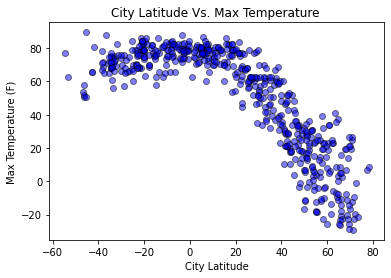

In [14]:
x_axis_lat = weather_df['Lat']
y_axis_temp = weather_df['Max Temp']
plt.scatter(x_axis_lat, y_axis_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.50)
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude Vs. Max Temperature ')
plt.savefig('output\latitude_vs_temperature.png')

This plot visualizes the relationship between the city's latitude and its maximum temperature. As the latitude increases the max temperature decreases.

## Latitude vs. Humidity Plot

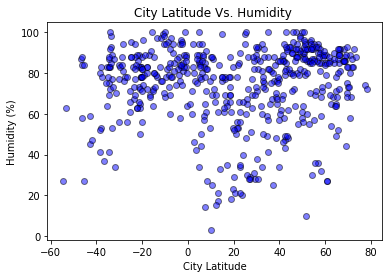

In [15]:
y_axis_hum = weather_df['Humidity']
plt.scatter(x_axis_lat, y_axis_hum, marker="o", facecolors="blue", edgecolors="black", alpha=0.50)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude Vs. Humidity ')
plt.savefig('output\latitude_vs_humidity.png')

This plot visualizes the relationship between the city latitude and percent humidity. There are more cities with higher levels of humidity than cities with a lower percentage of humidity.

## Latitude vs. Cloudiness Plot

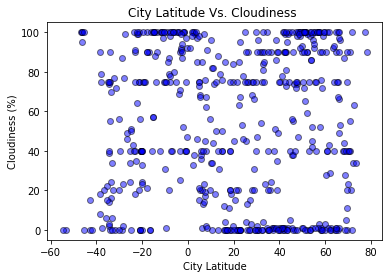

In [16]:
y_axis_cloud = weather_df['Cloudiness']
plt.scatter(x_axis_lat, y_axis_cloud, marker="o", facecolors="blue", edgecolors="black", alpha=0.50)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude Vs. Cloudiness ')
plt.savefig('output\latitude_vs_cloudiness.png')

City Latitude vs. Cloudiness- There appears to be clusters of cities with percentages of cloudiness at 100%, 80%, 40%, and 0%.

## Latitude vs. Wind Speed Plot

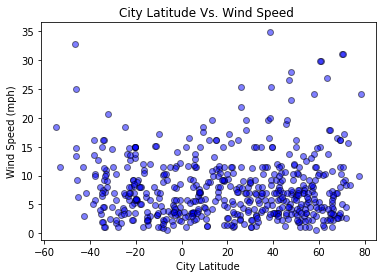

In [17]:
y_axis_wind = weather_df['Wind Speed']
plt.scatter(x_axis_lat, y_axis_wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.50)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude Vs. Wind Speed ')
plt.savefig('output\latitude_vs_windspeed.png')

The majority of cities have wind speeds below 15 mph.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
north_weather_df = weather_df.loc[weather_df['Lat'] >= 0]
north_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Hilo,19.7297,-155.0900,78.80,53,75,4.61,US
1,Chapais,49.7834,-74.8492,6.80,61,1,3.44,CA
2,Bose,45.4612,8.0137,43.00,80,38,5.61,IT
4,Kapaa,22.0752,-159.3190,75.20,53,20,11.50,US
5,Pestyaki,56.7103,42.6717,5.50,94,100,8.14,RU
...,...,...,...,...,...,...,...,...
532,Hirara,24.8000,125.2833,68.00,94,75,16.11,JP
533,Wajir,1.7471,40.0573,77.67,60,98,14.94,KE
534,Kalmunai,7.4167,81.8167,70.09,78,76,7.23,LK
535,Praia da Vitória,38.7333,-27.0667,59.00,67,20,19.95,PT


The r-value is: 0.794236470201914


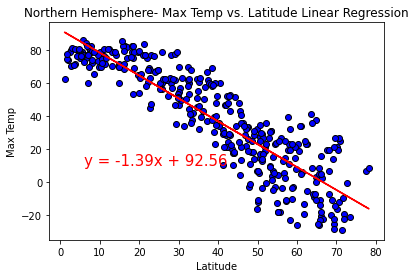

In [19]:
# Generate new variables to designate northern hemisphere data
north_weather_df = weather_df.loc[weather_df['Lat'] >= 0]
x_lat_north = north_weather_df['Lat']
y_temp_north = north_weather_df['Max Temp']
#create plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_temp_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_temp_north, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_lat_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere- Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig(r'output\north_lat_temp.png')
print(f"The r-value is: {rvalue**2}")

 Cities with higher latitudes (more northern) tend to have lower max temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.22122652395257775


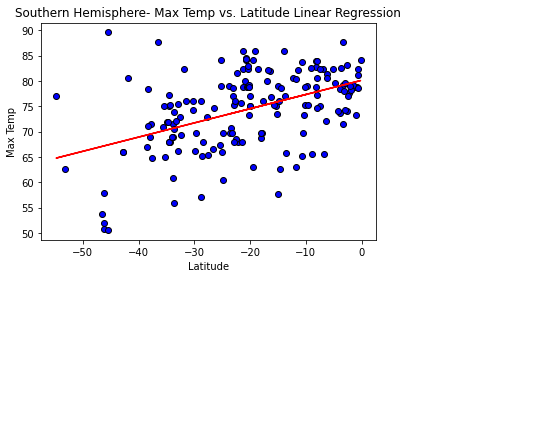

In [20]:
south_weather_df = weather_df.loc[weather_df['Lat'] <= 0]
x_lat_south = south_weather_df['Lat']
y_temp_south = south_weather_df['Max Temp']
#create plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_temp_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_temp_south, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_lat_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere- Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig(r'output\south_lat_temp.png')
print(f"The r-value is: {rvalue**2}")

As the latitude approaches 0 (Equator), the max temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06332875932903514


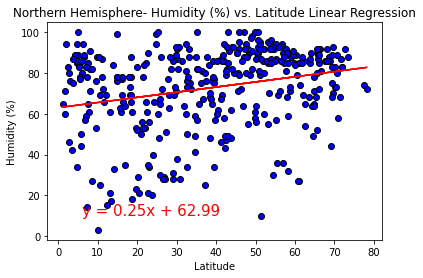

In [21]:
north_weather_df = weather_df.loc[weather_df['Lat'] >= 0]
x_lat_north = north_weather_df['Lat']
y_hum_north = north_weather_df['Humidity']
#create plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_hum_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_hum_north, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_lat_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere- Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(r'output\north_lat_humidity.png')
print(f"The r-value is: {rvalue**2}")

There is no clearly defined relationship between a city's latitude and the percent humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15303459629744182


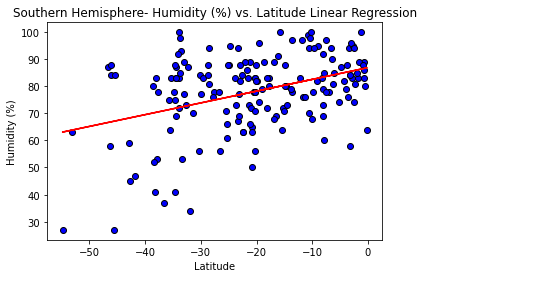

In [22]:
south_weather_df = weather_df.loc[weather_df['Lat'] <= 0]
x_lat_south = south_weather_df['Lat']
y_hum_south = south_weather_df['Humidity']
#create plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_hum_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_hum_south, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_lat_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere- Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(r'output\south_lat_humidity.png')
print(f"The r-value is: {rvalue**2}")

There is no clearly defined relationship between a city's latitude and the percent humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0111360355653733


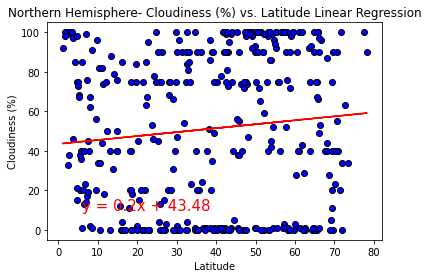

In [23]:
north_weather_df = weather_df.loc[weather_df['Lat'] >= 0]
x_lat_north = north_weather_df['Lat']
y_cloud_north = north_weather_df['Cloudiness']
#create plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_cloud_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_cloud_north, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_lat_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere- Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(r'output\north_lat_cloudy.png')
print(f"The r-value is: {rvalue**2}")

There is no clearly defined relationship between cloudiness and a city's latitude in the northern hemisphere. Cities appear to cluster around specific percentages of cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1701552544968799


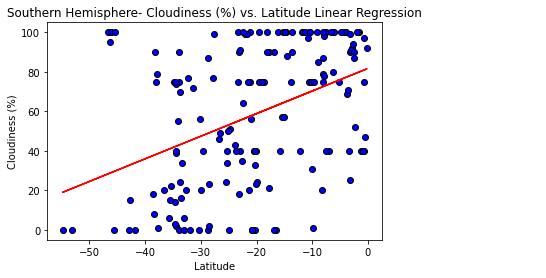

In [24]:
south_weather_df = weather_df.loc[weather_df['Lat'] <= 0]
x_lat_south = south_weather_df['Lat']
y_cloud_south = south_weather_df['Cloudiness']
#create plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_cloud_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_cloud_south, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_lat_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere- Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(r'output\south_lat_cloudy.png')
print(f"The r-value is: {rvalue**2}")

There is no clearly defined relationship between cloudiness and a city's latitude in the southern hemisphere. Cities appear to cluster around specific percentages of cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004859695165351166


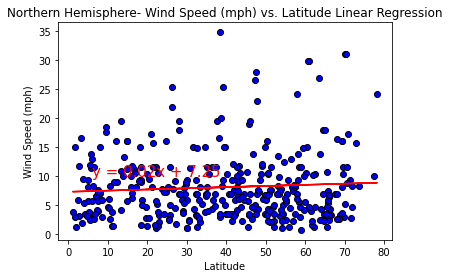

In [25]:
north_weather_df = weather_df.loc[weather_df['Lat'] >= 0]
x_lat_north = north_weather_df['Lat']
y_wind_north = north_weather_df['Wind Speed']
#create plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_wind_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_wind_north, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_lat_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(r'output\north_lat_windspeed.png')
print(f"The r-value is: {rvalue**2}")

Windspeed does not appear to be affected by latitude in the northern hemisphere. The majority of cities in this population have a wind speed of 15 mph or less.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11146978825742894


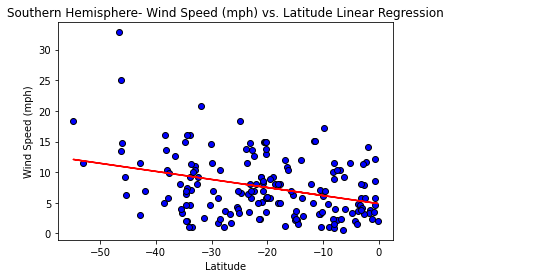

In [26]:
south_weather_df = weather_df.loc[weather_df['Lat'] <= 0]
x_lat_south = south_weather_df['Lat']
y_wind_south = south_weather_df['Wind Speed']
#create plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_wind_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_wind_south, marker='o', facecolor='blue', edgecolor='black')
plt.plot(x_lat_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(r'output\south_lat_windspeed.png')
print(f"The r-value is: {rvalue**2}")

Windspeed does not appear to be affected by latitude in the southern hemisphere. The majority of cities in this population have a wind speed of 15 mph or less.